# Tarea de Regresión Lineal

## Introducción
Esta tarea consiste en la implementación en python del algoritmo de gradiente descendiente. Esta implementación soluciona el problema de regresión trabajado en clase, tomando en cuenta las siguientes características:
<ol>
    <li>
        <strong>Implementación interactiva:</strong> Se permite la modificación de la taza de aprendizaje por medio de la librería <a href="https://ipywidgets.readthedocs.io/en/stable/">ipwidgets</a>.
    </li>
    <li>
        <strong>Uso de gráficos:</strong> Se puede visualizar los cambios en la función de costo a medida que se actualiza el valor de la taza de aprendizaje.
    </li>
    <li>
        <strong>Regresión multivariable:</strong> Se ha realizado la implementación de regresión multivariable
    </li>
</ol>

<strong>Estudiante:</strong> Mónica Gabriela Cabañas Meléndez 

### Importación de librerías necesarias y carga de datos

In [282]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [283]:
# Loading the data
data = pd.read_excel('Real estate valuation data set.xlsx')

# Displaying the first 5 rows of the data
data.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


## Regresión Lineal

A continuación se desarrolla una función que representa el modelo de Regresión Lineal Multivariable visto en clase: 
$$
    h_{\theta} = \mathbf{\theta_{0}} + x_{1}^{(i)} \theta_{1} + ... + x_{d}^{(i)} \theta_{d}  
$$ 

Para realizar el cálculo para cada $ x^{(i)} $ en donde se tienen $ n $ casos de prueba y $ d $ factores (variables) a tomar en cuenta en una sola operación se procederá a utilizar la notación matricial del modelo: 

$$ 
    \mathbf{h_{\theta}} = \mathbf{A} \mathbf{\theta} 
$$

Donde: 
$$ 
    \mathbf{A} = 
    \begin{bmatrix}
        1 & x_{1}^{(1)} & x_{2}^{(1)} & ... & x_{d}^{(1)}\\
        1 & . & . & ... & .\\ 
        1 & . & . & ... & .\\
        1 & . & . & ... & .\\
        1 & x_{1}^{(n)} & x_{2}^{(n)} & ... & x_{d}^{(n)}
    \end{bmatrix} 

    ,

    \mathbf{\theta} = 
    \begin{bmatrix}
        \theta_{0}\\
        \theta_{1}\\
        \theta_{2}\\
        .\\
        .\\
        .\\
        \theta_{d}
    \end{bmatrix}
$$

Por lo tanto, la función recibirá como parámetros la matriz de regresores $ \mathbf{A} $ y el vector de parámetros $ \mathbf{\theta} $.

In [284]:
# Defining the linear regression function
def linear_regression(A, theta): 
    return np.matmul(A,theta)

## Función de costo

A continuación se desarrolla la función que calcula el error cuadrático medio del modelo de Regresión Lineal (Mean Squared Error): 
$$
    J(\theta_{0}, \theta_{1}, ... , \theta_{d}) = \frac{1}{n} \sum_{i=1}^{n}[h_{\theta}(x^{(i)}) - y^{(i)}]^{2}
$$
El error se puede expresar en notación matricial de la siguiente manera: 
$$
    \mathbf{e} = \mathbf{A\theta} - \mathbf{Y}
$$
Quedando como una matriz de dimensión $ n \times 1 $. Por lo tanto para poder expresar la función de costo en notación matricial, la expresión quedaría de la siguiente manera:
$$
    J(\theta_{0}, \theta_{1}, ... , \theta_{d}) = \frac{1}{n} \mathbf{e^T} \mathbf{e}
$$

En donde multiplicamos la transpuesta del error por la matriz de error para poder obtener un escalar como resultado final.


In [285]:
# Defining function for cost function
def cost_function(h, y):
    e = np.subtract(h, y)
    return (1 / len(y)) * np.matmul(e.T, e)

## Gradiente de la función de costo

Antes de proceder a ejecutar el algoritmo de Gradiente Descendiente debemos encontrar el grandiente de la función de costo, que no es más que el vector que contiene todas las derivadas parciales de las cuales depende esta función y apunta a la dirección de mayor incremento de esta. El gradiente podemos encontrarlo de la siguiente manera: 

$$
    J = \frac{1}{n} \mathbf{e^T}\mathbf{e}
$$
$$
    J = \frac{1}{2n}  \mathbf{e^T}\mathbf{e}
$$
$$
    \frac{\partial}{\partial \theta} J = \frac{\partial}{\partial \theta} [\frac{1}{2n}  \mathbf{e^T}\mathbf{e}]
$$
Aplicando reglas de cálculo:
$$
    \nabla_{\theta} J = \frac{1}{n} \mathbf{A^T} \mathbf{e}
$$

Siendo $ \mathbf{A^T} $ de dimensión $ (d + 1) \times n $ que al multiplicarse por la matriz del error $ \mathbf{e} $ con dimensión $ n \times 1 $ obtenemos el vector del gradiente con dimensión de $ (d + 1) \times 1$

In [286]:
# Defining the function for obtaining the gradient vector
def gradient(A, h, y):
    e = np.subtract(h, y)
    return (1 / len(y)) * np.matmul(A.T, e)

## Gradiente Descendiente

Finalmente, para obtener los valores óptimos de todos los parámetros dentro de la matriz $ \mathbf{\theta} $ se procederá a ejecutar el algoritmo de Gradiente Descendiente aprendido en clase: 

$$
    \theta_{0} := \theta_{0} - \alpha \frac{\partial J}{\partial \theta_{0}}
$$

$$
    \theta_{1} := \theta_{1} - \alpha \frac{\partial J}{\partial \theta_{1}}
    .\\ .\\ .\\
    \theta_{d} := \theta_{d} - \alpha \frac{\partial J}{\partial \theta_{d}}
$$

Que al expresarlo en notación matricial queda de la siguiente manera: 

$$
    \mathbf{\theta} := \mathbf{\theta} - \frac{\alpha}{n} \mathbf{A^T}\mathbf{e}
$$

In [287]:
def gradient_descent(alpha, theta, A, y, num_iters):
    h = linear_regression(A, theta)
    J_history = [cost_function(h, y)]
    
    for i in range(num_iters): 
        # Calculate the gradient
        g = abs(gradient(A, h, y))

        # Break the loop if the gradient is small, or if g contains NaN or Inf
        if np.all(g < 0.001):
            print('El gradiente es cercano a cero después de ', i, ' iteraciones')
            break
        elif np.any(np.isinf(g)) or np.any(np.isnan(g)):
            print('El gradiente contiene valores Inf o NaN después de ', i, ' iteraciones')
            break
        
        # If the gradient is not close to zero, update the theta values
        theta = np.subtract(theta, alpha * gradient(A, h, y)) 
        
        h = linear_regression(A, theta)
        J_history.append(cost_function(h, y))
        
    return theta, J_history

In [288]:
# Defining the A matrix
ones = np.ones(len(data))
x1 = data['X1 transaction date']
x2 = data['X2 house age']
x3 = data['X3 distance to the nearest MRT station']
x4 = data['X4 number of convenience stores']
x5 = data['X5 latitude']
x6 = data['X6 longitude']
x = np.column_stack((x1,x2,x3,x4,x5,x6))
A = np.column_stack((ones, x))

# Defining the vector of thetas
theta = np.random.rand(A.shape[1])

y = data['Y house price of unit area']

theta, J_history = gradient_descent(0.00001, theta, A, y, 1000)

El gradiente contiene valores Inf o NaN después de  172  iteraciones


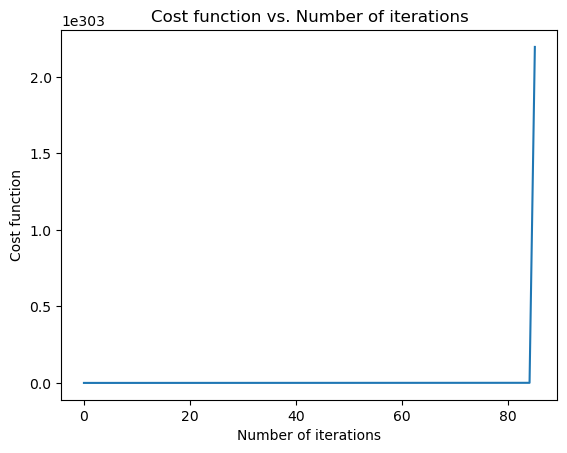

In [289]:
# Plotting the cost function against the number of iterations
plt.plot(J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.title('Cost function vs. Number of iterations')
plt.show()